<a href="https://colab.research.google.com/github/Shaurya0108/cs4372/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from xgboost import XGBClassifier
import graphviz
from sklearn.tree import export_graphviz
%matplotlib inline

# Data Loading and Exploration

In [3]:
url = "https://raw.githubusercontent.com/Shaurya0108/cs4372/main/data/diabetes_dataset00.csv"
df = pd.read_csv(url)

In [4]:
print(df.info())
print("\nSample of the data:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Target                         70000 non-null  object
 1   Genetic Markers                70000 non-null  object
 2   Autoantibodies                 70000 non-null  object
 3   Family History                 70000 non-null  object
 4   Environmental Factors          70000 non-null  object
 5   Insulin Levels                 70000 non-null  int64 
 6   Age                            70000 non-null  int64 
 7   BMI                            70000 non-null  int64 
 8   Physical Activity              70000 non-null  object
 9   Dietary Habits                 70000 non-null  object
 10  Blood Pressure                 70000 non-null  int64 
 11  Cholesterol Levels             70000 non-null  int64 
 12  Waist Circumference            70000 non-null  int64 
 13  B

In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               0
Waist Circumference              0
Blood Glucose Levels             0
Ethnicity                        0
Socioeconomic Factors            0
Smoking Status                   0
Alcohol Consumption              0
Glucose Tolerance Test           0
History of PCOS                  0
Previous Gestational Diabetes    0
Pregnancy History                0
Weight Gain During Pregnancy     0
Pancreatic Health                0
Pulmonary Function               0
Cystic Fibrosis Diagnosis        0
Steroid Use History              0
Genetic Testing                  0
Neu

In [6]:
# Analyze the target variable
print("\nUnique values in the Outcome column:")
print(df['Target'].value_counts())


Unique values in the Outcome column:
Target
MODY                                          5553
Secondary Diabetes                            5479
Cystic Fibrosis-Related Diabetes (CFRD)       5464
Type 1 Diabetes                               5446
Neonatal Diabetes Mellitus (NDM)              5408
Wolcott-Rallison Syndrome                     5400
Type 2 Diabetes                               5397
Prediabetic                                   5376
Gestational Diabetes                          5344
Type 3c Diabetes (Pancreatogenic Diabetes)    5320
Wolfram Syndrome                              5315
Steroid-Induced Diabetes                      5275
LADA                                          5223
Name: count, dtype: int64


In [11]:
# Encode the target variable
from sklearn.preprocessing import LabelEncoder, StandardScaler
le_target = LabelEncoder()
df['Target'] = le_target.fit_transform(df['Target'])

print("\nEncoded Target values:")
print(df['Target'].value_counts())


Encoded Target values:
Target
3     5553
6     5479
0     5464
8     5446
4     5408
11    5400
9     5397
5     5376
1     5344
10    5320
12    5315
7     5275
2     5223
Name: count, dtype: int64


In [12]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Target')  # Remove Target from numeric columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns.tolist())


Numeric columns: ['Insulin Levels', 'Age', 'BMI', 'Blood Pressure', 'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels', 'Weight Gain During Pregnancy', 'Pancreatic Health', 'Pulmonary Function', 'Neurological Assessments', 'Digestive Enzyme Levels', 'Birth Weight']

Categorical columns: ['Genetic Markers', 'Autoantibodies', 'Family History', 'Environmental Factors', 'Physical Activity', 'Dietary Habits', 'Ethnicity', 'Socioeconomic Factors', 'Smoking Status', 'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS', 'Previous Gestational Diabetes', 'Pregnancy History', 'Cystic Fibrosis Diagnosis', 'Steroid Use History', 'Genetic Testing', 'Liver Function Tests', 'Urine Test', 'Early Onset Symptoms']


In [13]:
# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [16]:
# Split the data
X = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (56000, 33)
Shape of test set: (14000, 33)


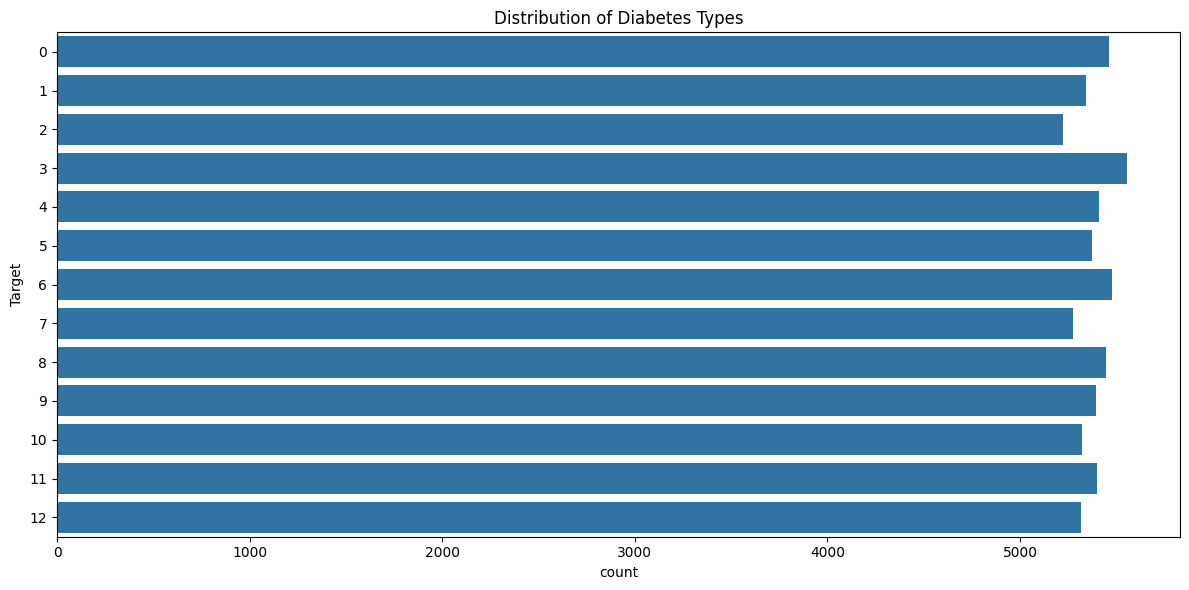

In [17]:
# Visualize the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.countplot(y='Target', data=df)
plt.title('Distribution of Diabetes Types')
plt.tight_layout()
plt.show()

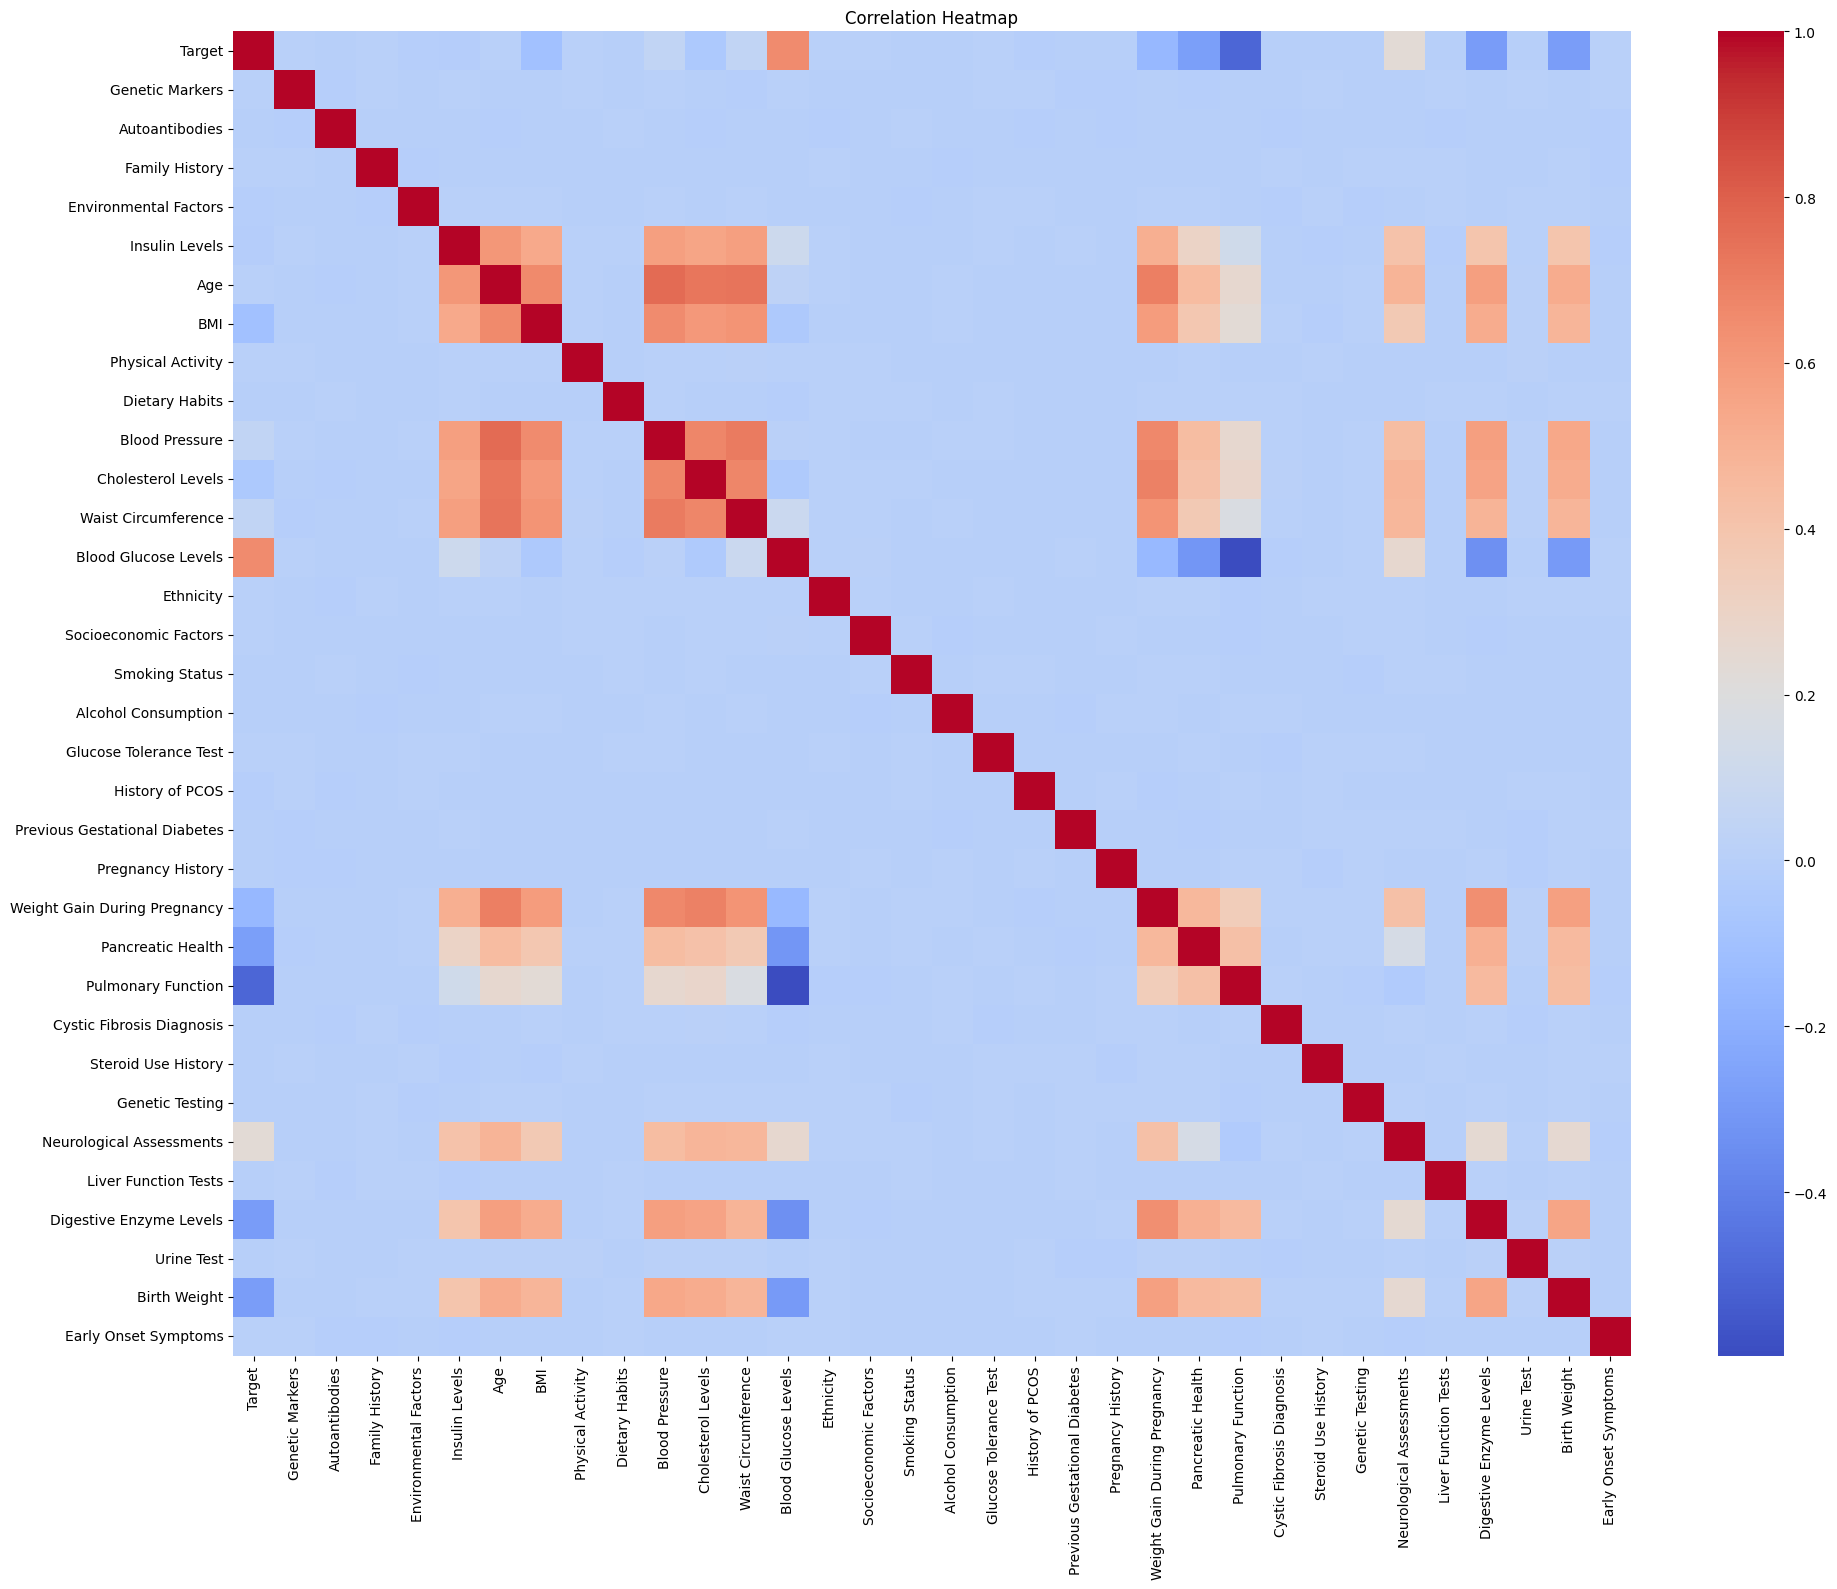

In [18]:
# Correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [19]:
# Save the label encoder classes for later use
target_classes = le_target.classes_
print("\nTarget classes:")
for i, class_name in enumerate(target_classes):
    print(f"{i}: {class_name}")


Target classes:
0: Cystic Fibrosis-Related Diabetes (CFRD)
1: Gestational Diabetes
2: LADA
3: MODY
4: Neonatal Diabetes Mellitus (NDM)
5: Prediabetic
6: Secondary Diabetes
7: Steroid-Induced Diabetes
8: Type 1 Diabetes
9: Type 2 Diabetes
10: Type 3c Diabetes (Pancreatogenic Diabetes)
11: Wolcott-Rallison Syndrome
12: Wolfram Syndrome


In [20]:
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Model Construction - Decision Tree

In [72]:
# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [73]:
# Create the model
dt = DecisionTreeClassifier(random_state=42)

In [74]:
# Perform GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [75]:
# Get the best model
best_dt = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

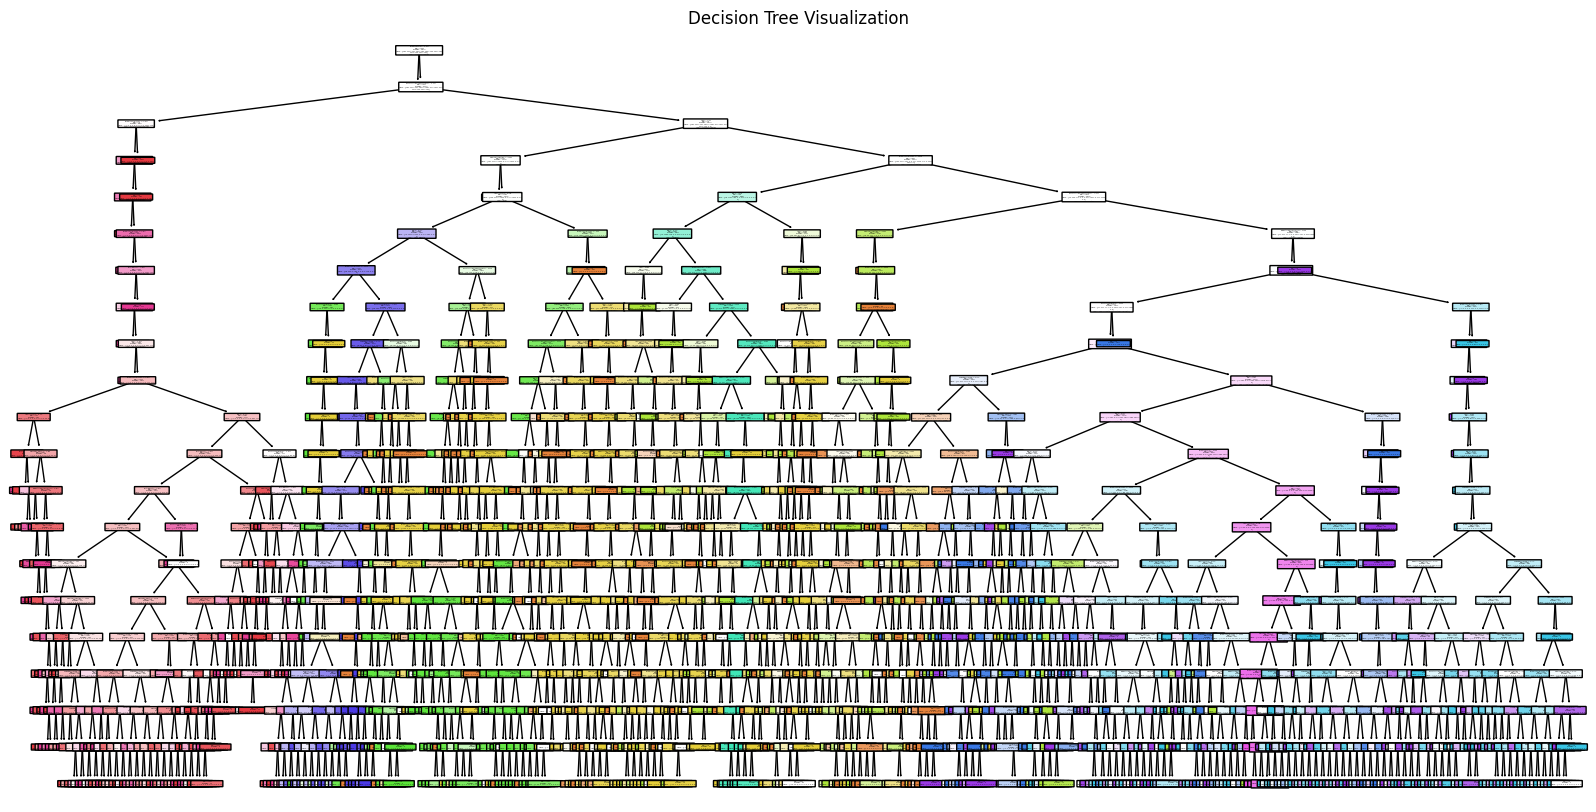

In [77]:
# Convert encoded classes back to original names
class_names = [target_classes[i] for i in best_dt.classes_]

plt.figure(figsize=(20,10))
plot_tree(best_dt,
          feature_names=X.columns.tolist(),  # Convert to list to ensure it's not an Index object
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [78]:
# Make predictions
y_pred = best_dt.predict(X_test)
y_pred_proba = best_dt.predict_proba(X_test)

In [79]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1070
           1       0.87      0.88      0.87      1072
           2       0.95      0.90      0.92      1072
           3       0.93      0.85      0.89      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.99      1089
           6       0.81      0.69      0.75      1053
           7       0.77      0.83      0.80      1048
           8       0.86      0.96      0.91      1123
           9       0.86      0.71      0.78      1083
          10       0.80      1.00      0.89      1064
          11       0.91      0.88      0.90      1063
          12       0.88      0.91      0.90      1051

    accuracy                           0.89     14000
   macro avg       0.89      0.89      0.88     14000
weighted avg       0.89      0.89      0.88     14000



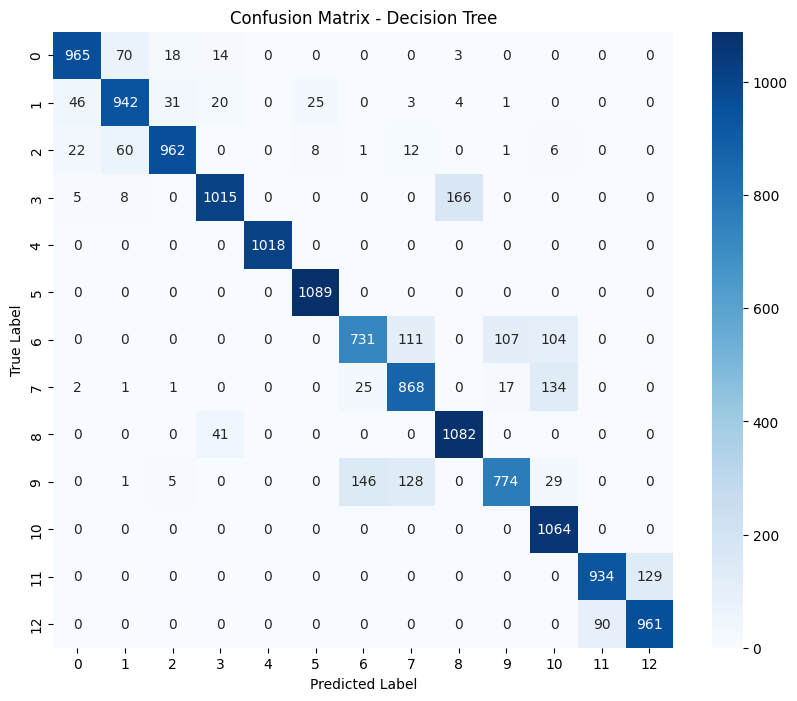

In [80]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

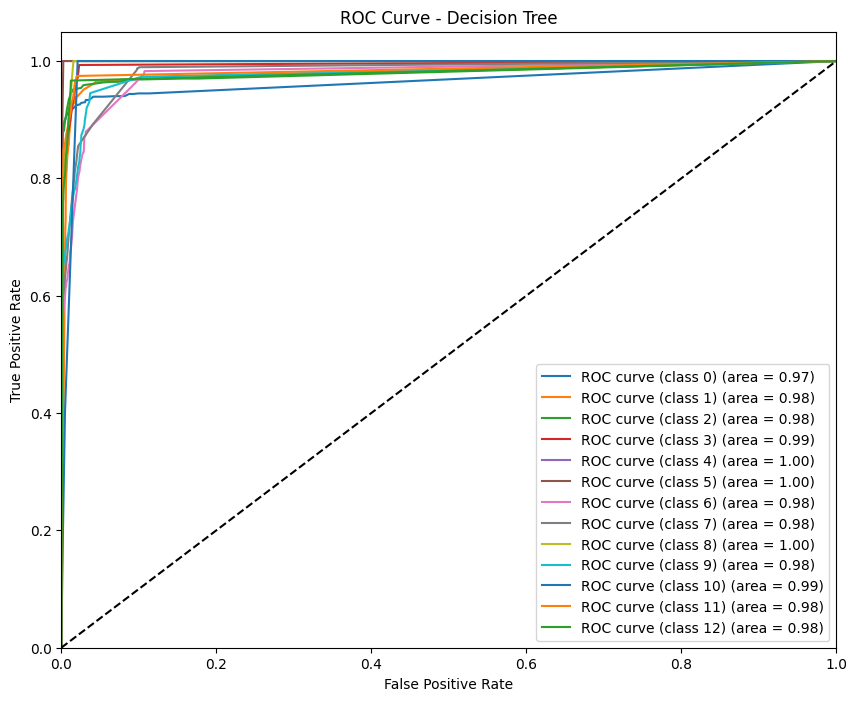

In [81]:
# ROC Curve
n_classes = len(best_dt.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

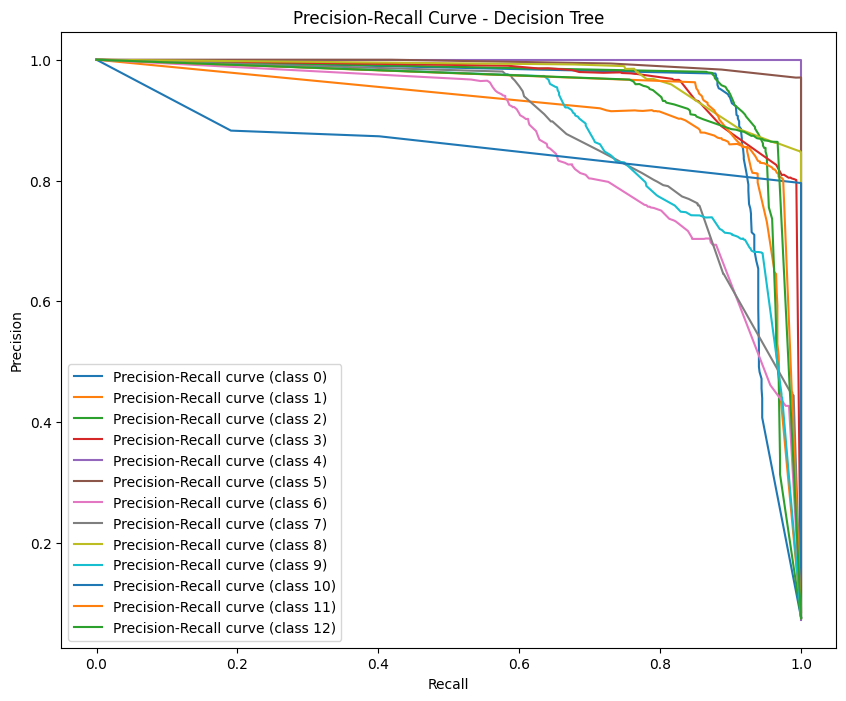

In [82]:
# Precision-Recall Curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (class {i})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend(loc="lower left")
plt.show()

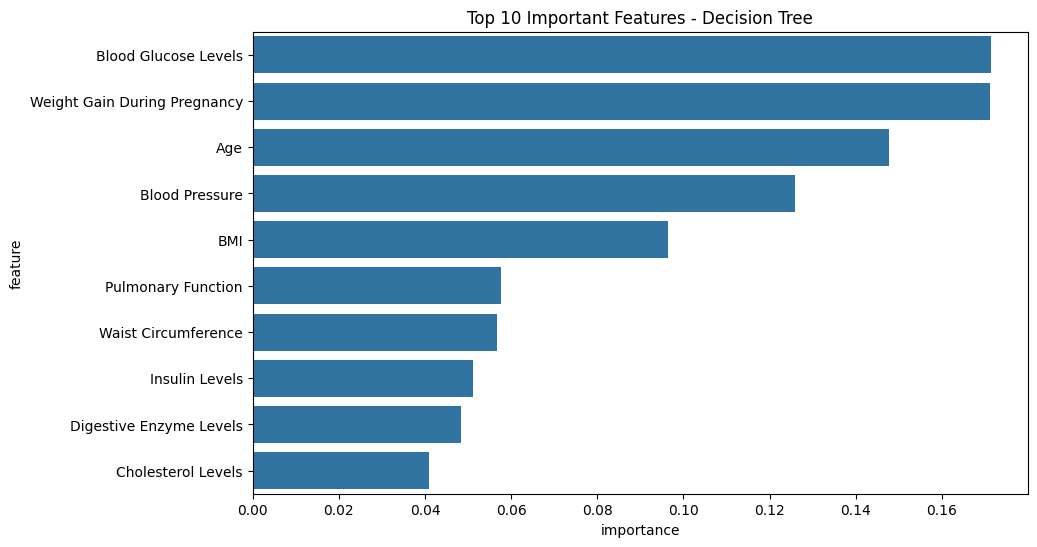

In [83]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features - Decision Tree')
plt.show()

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [91]:
# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [86]:
# Create the model
rf = RandomForestClassifier(random_state=42)

In [92]:
# Perform RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2  # Add verbosity to see progress
)

In [93]:
print("Fitting the model. This may take a few minutes...")
random_search.fit(X_train, y_train)

Fitting the model. This may take a few minutes...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4dec8f2e90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4dec8f14b0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e4dec8f1390>},
                   random_state=42, scoring='accuracy', verbose=2)

In [94]:
# Get the best model
best_rf = random_search.best_estimator_

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 393}
Best score: 0.9028928571428573


In [95]:
# Save the best model for later use
import joblib
joblib.dump(best_rf, 'best_random_forest_model.joblib')

print("Model saved as 'best_random_forest_model.joblib'")

Model saved as 'best_random_forest_model.joblib'


In [97]:
# Convert encoded classes back to original names
class_names = [target_classes[i] for i in best_rf.classes_]

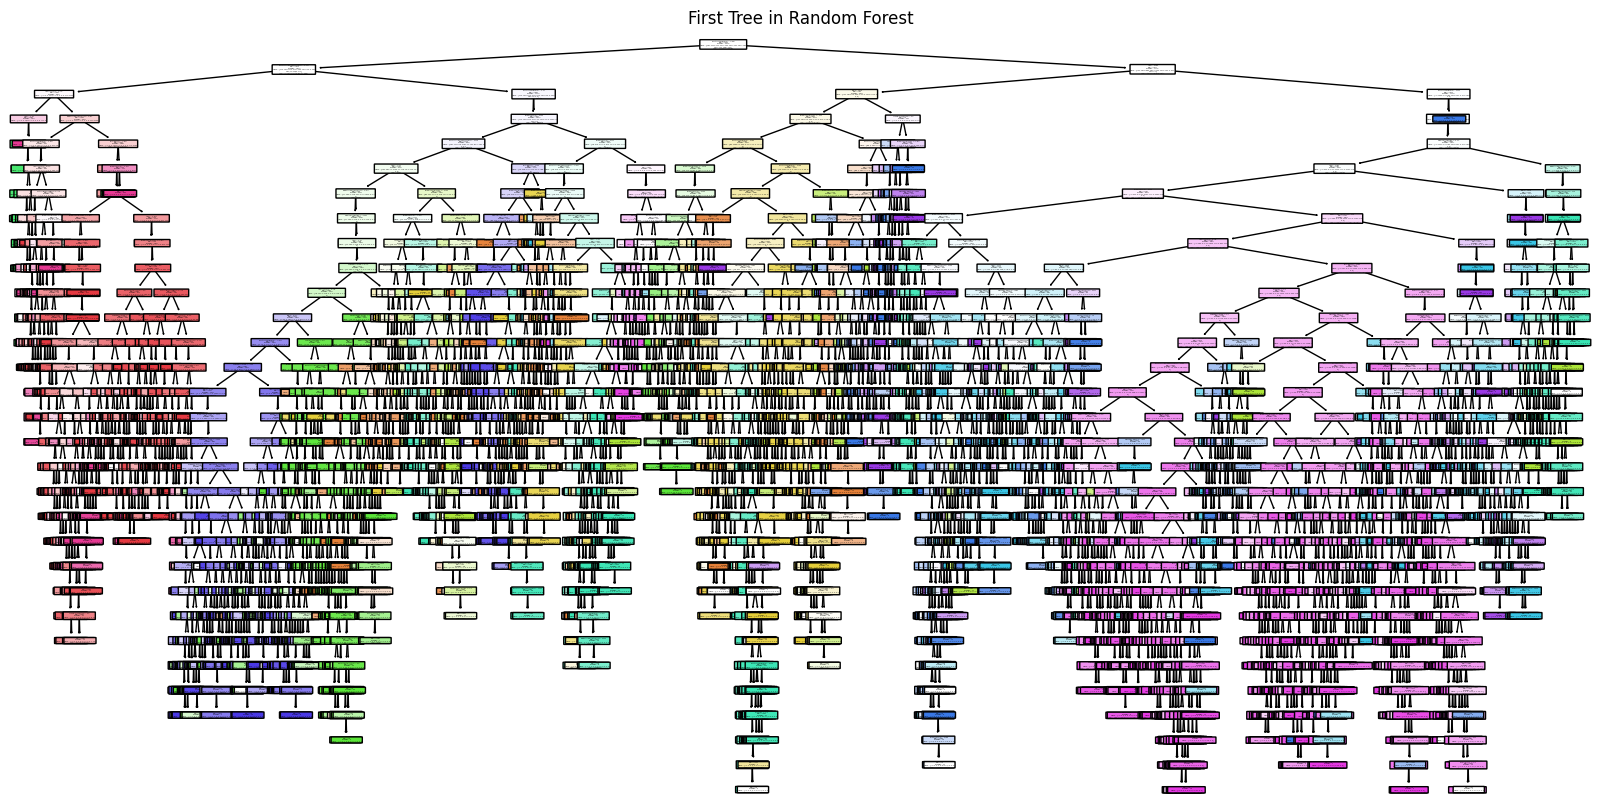

In [98]:
# Plot the first tree in the forest
plt.figure(figsize=(20,10))
plot_tree(best_rf.estimators_[0],
          feature_names=X.columns.tolist(),  # Convert to list to ensure it's not an Index object
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("First Tree in Random Forest")
plt.show()

In [99]:
# Make predictions
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)

In [100]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1070
           1       0.89      0.92      0.91      1072
           2       0.95      0.94      0.95      1072
           3       0.96      0.84      0.89      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.98      1089
           6       0.78      0.78      0.78      1053
           7       0.80      0.83      0.82      1048
           8       0.84      1.00      0.92      1123
           9       0.94      0.67      0.78      1083
          10       0.80      1.00      0.89      1064
          11       1.00      0.84      0.91      1063
          12       0.86      1.00      0.92      1051

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



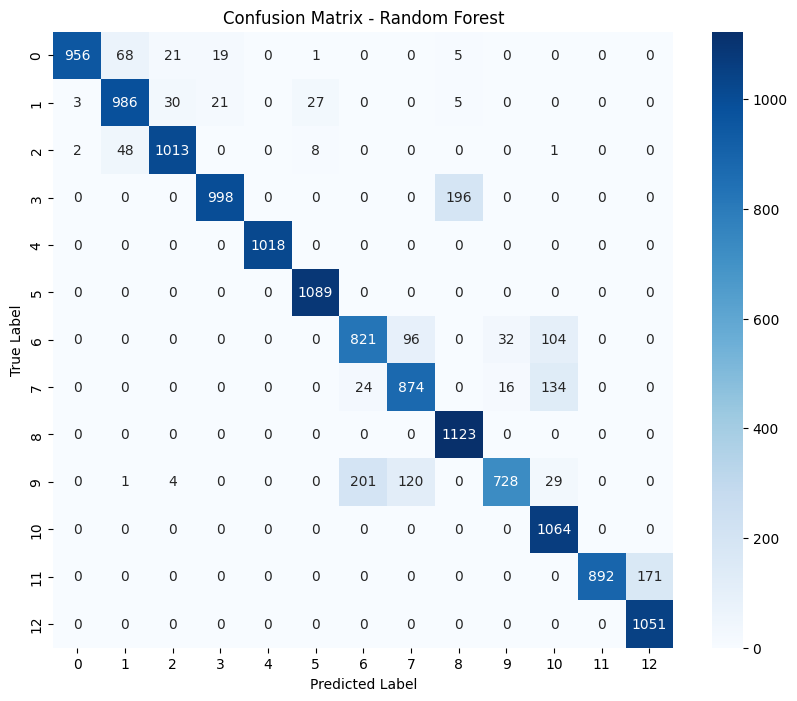

In [101]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

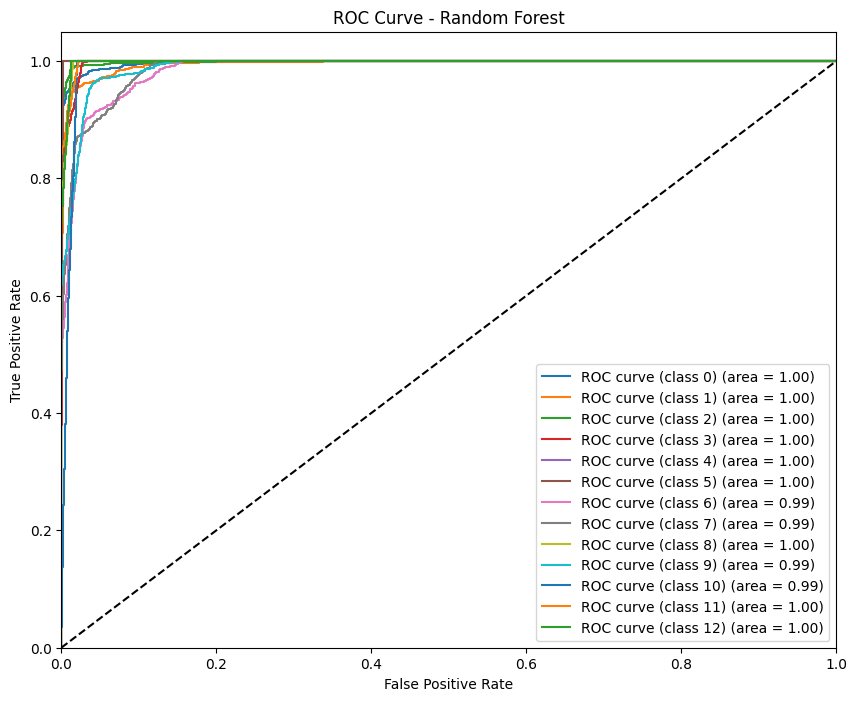

In [102]:
# ROC Curve
n_classes = len(best_rf.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

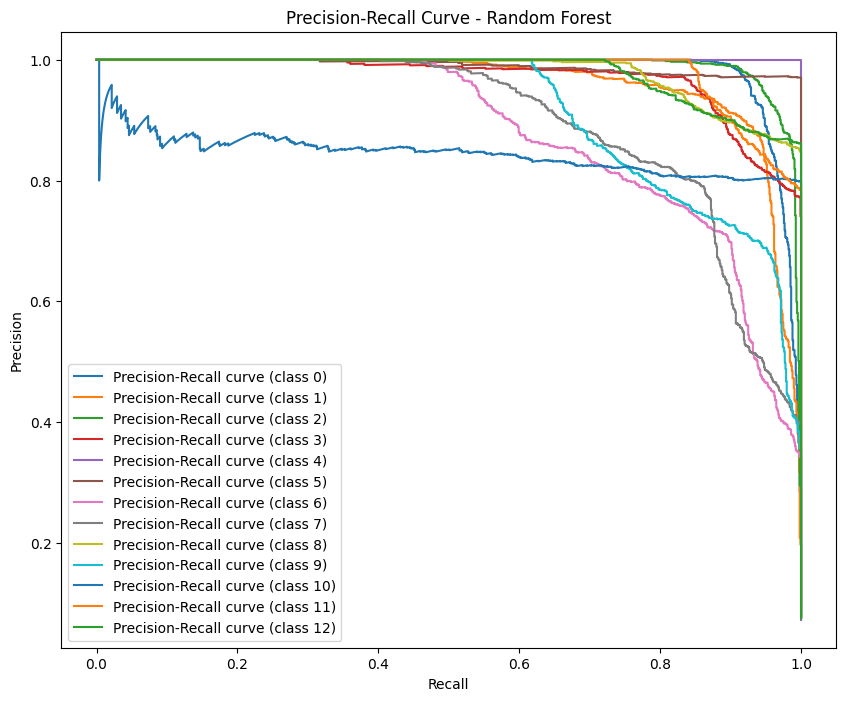

In [103]:
# Precision-Recall Curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (class {i})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc="lower left")
plt.show()

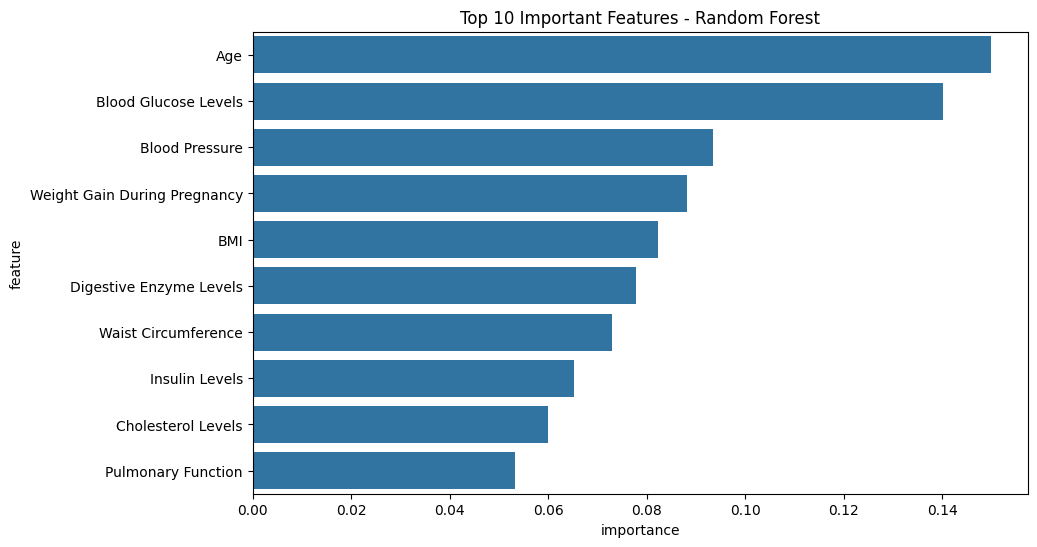

In [104]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features - Random Forest')
plt.show()

# AdaBoost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Create the base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

In [27]:
# Create the AdaBoost model
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42)

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]  # Note the change from 'base_estimator__max_depth' to 'estimator__max_depth'
}

In [29]:
# Perform GridSearchCV
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [30]:
# Get the best model
best_ada = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Best parameters: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 200}


In [32]:
# Convert encoded classes back to original names
class_names = [target_classes[i] for i in best_ada.classes_]

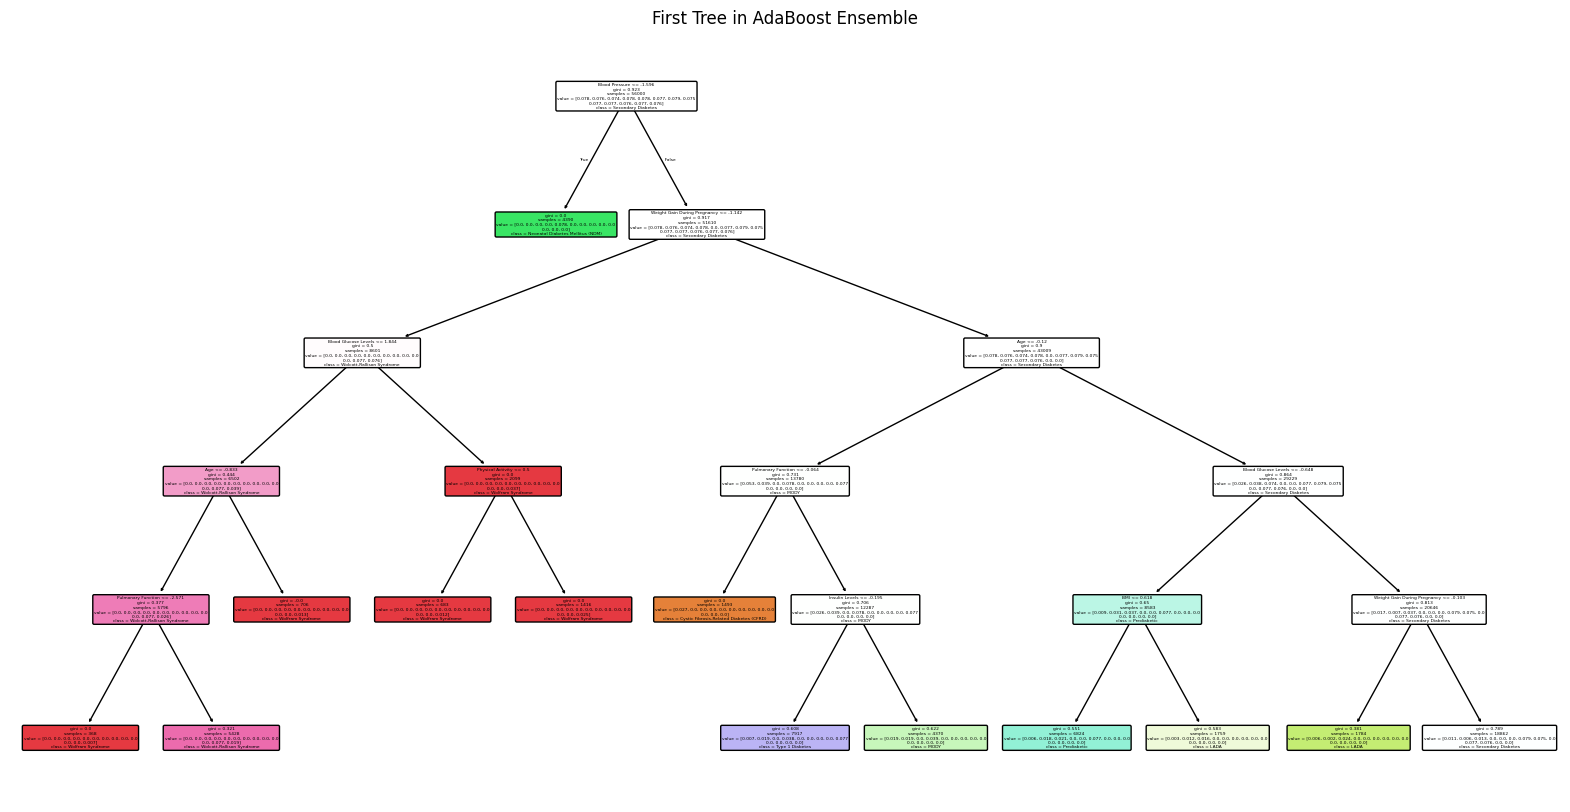

In [34]:
# Plot the first tree in the ensemble
plt.figure(figsize=(20,10))
plot_tree(best_ada.estimators_[0],  # Use the estimator directly, not .tree_
          feature_names=X.columns.tolist(),  # Convert to list to ensure it's not an Index object
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("First Tree in AdaBoost Ensemble")
plt.show()

In [35]:
# Make predictions
y_pred = best_ada.predict(X_test)
y_pred_proba = best_ada.predict_proba(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1070
           1       0.88      0.95      0.91      1072
           2       0.92      0.91      0.92      1072
           3       0.97      0.84      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      0.94      0.95      1089
           6       0.78      0.79      0.79      1053
           7       0.78      0.86      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.98      0.64      0.78      1083
          10       0.80      1.00      0.89      1064
          11       1.00      0.77      0.87      1063
          12       0.81      1.00      0.90      1051

    accuracy                           0.89     14000
   macro avg       0.90      0.89      0.89     14000
weighted avg       0.90      0.89      0.89     14000



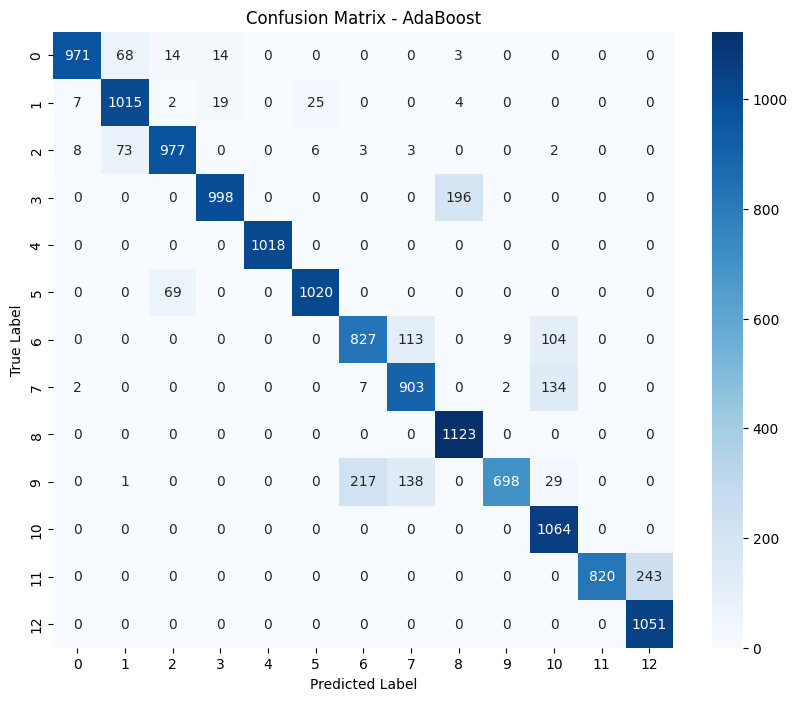

In [36]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - AdaBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

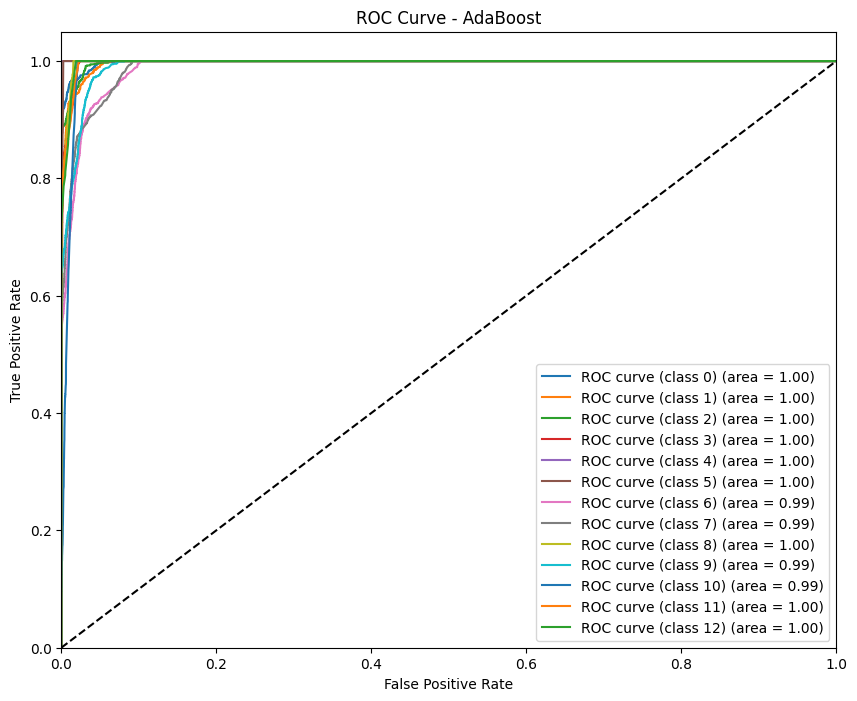

In [37]:
# ROC Curve
n_classes = len(best_ada.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()

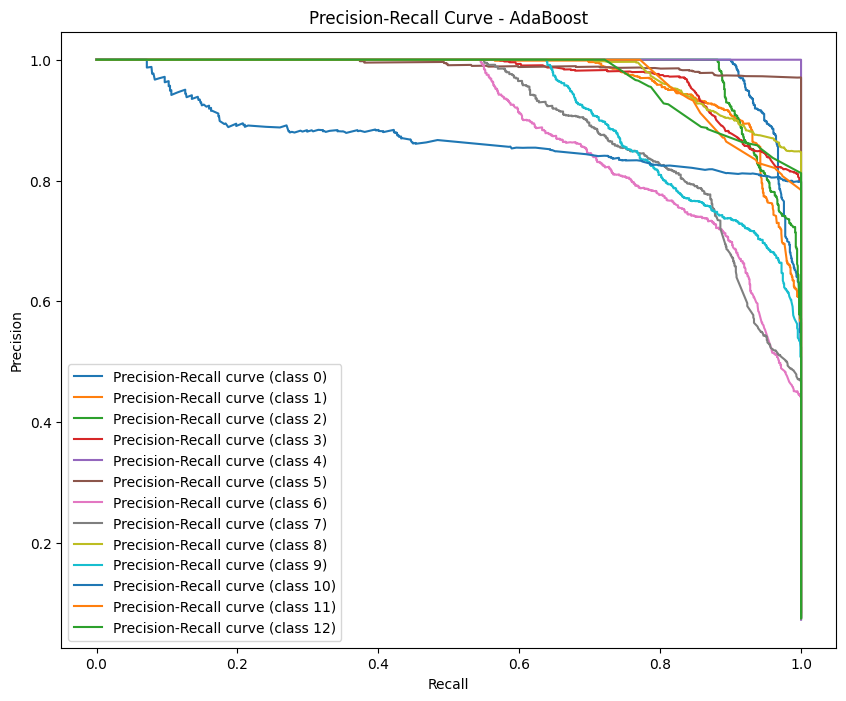

In [38]:
# Precision-Recall Curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test == i, y_pred_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (class {i})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - AdaBoost')
plt.legend(loc="lower left")
plt.show()

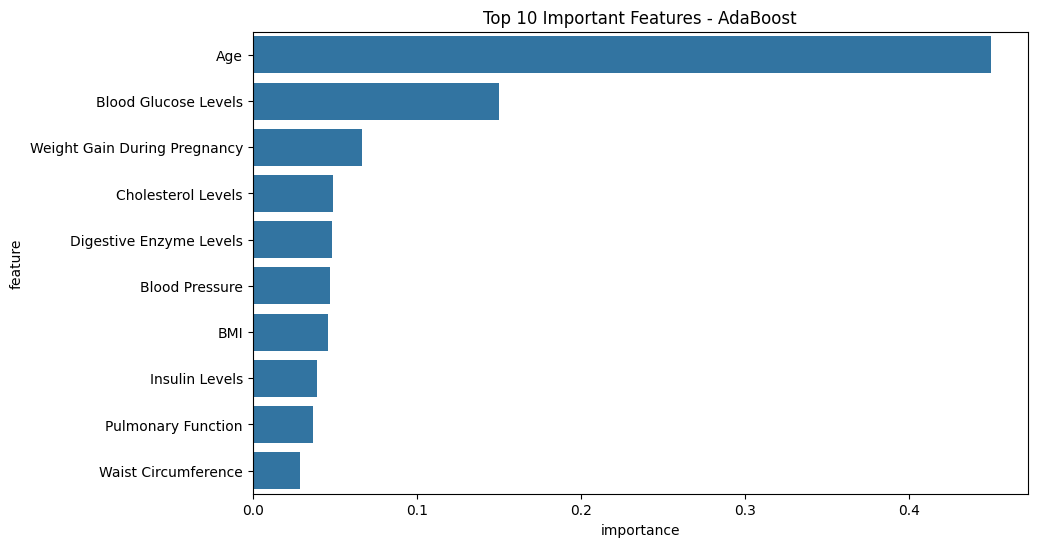

In [39]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_ada.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features - AdaBoost')
plt.show()

# XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

In [42]:
# Create the model
xgb = XGBClassifier(random_state=42)

In [43]:
# Perform GridSearchCV
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [44]:
# Get the best model
best_xgb = grid_search.best_estimator_

print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100}


In [45]:
# Make predictions
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)

In [46]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1070
           1       0.89      0.95      0.92      1072
           2       0.98      0.93      0.95      1072
           3       0.97      0.84      0.90      1194
           4       1.00      1.00      1.00      1018
           5       0.97      1.00      0.99      1089
           6       0.78      0.79      0.79      1053
           7       0.78      0.86      0.82      1048
           8       0.85      1.00      0.92      1123
           9       0.99      0.64      0.78      1083
          10       0.80      1.00      0.89      1064
          11       0.98      0.84      0.91      1063
          12       0.86      0.99      0.92      1051

    accuracy                           0.90     14000
   macro avg       0.91      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



Text(0.5, 58.7222222222222, 'Predicted')

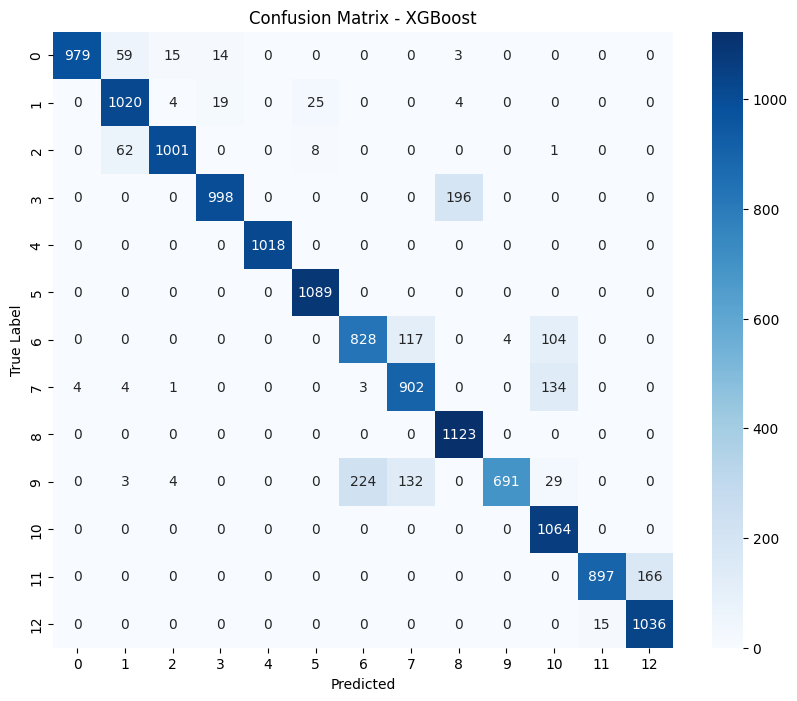

In [48]:
# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.ylabel('True Label')
plt.xlabel('Predicted')

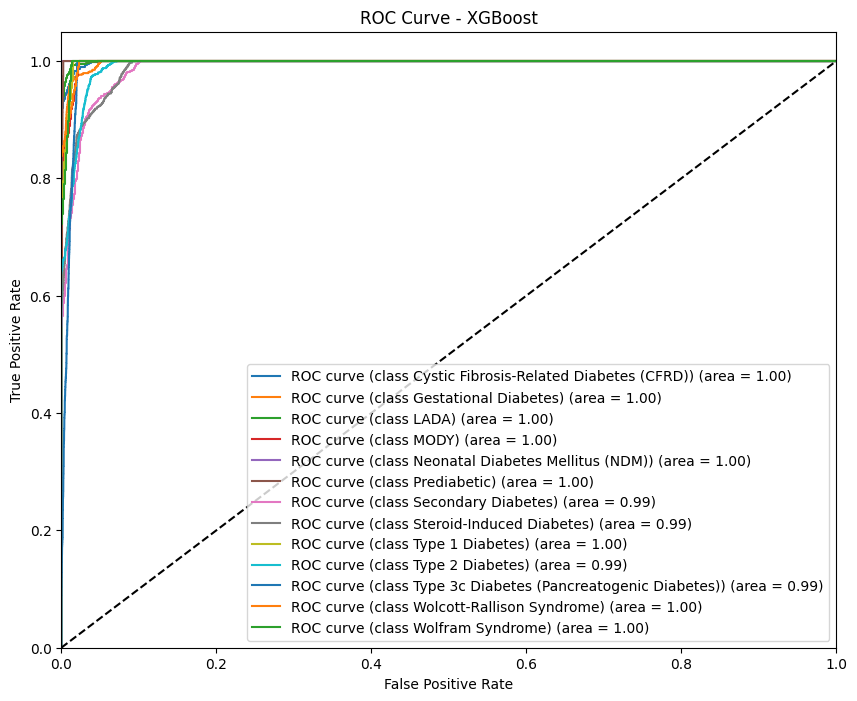

In [49]:
# ROC Curve
n_classes = len(target_classes)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {target_classes[i]}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

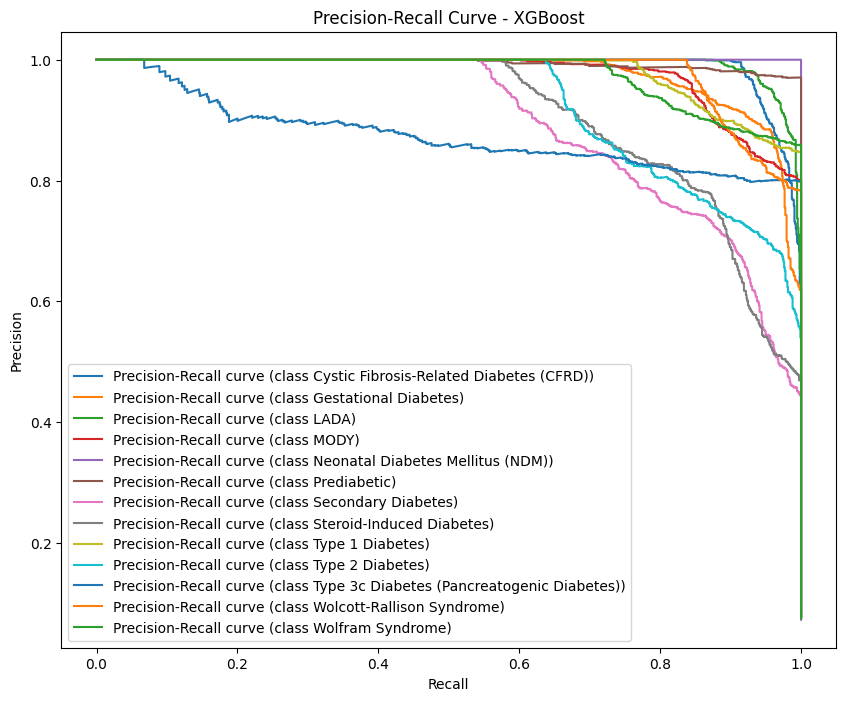

In [50]:
# Precision-Recall Curve
precision = dict()
recall = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve((y_test == i).astype(int), y_pred_proba[:, i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (class {target_classes[i]})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')
plt.legend(loc="lower left")
plt.show()

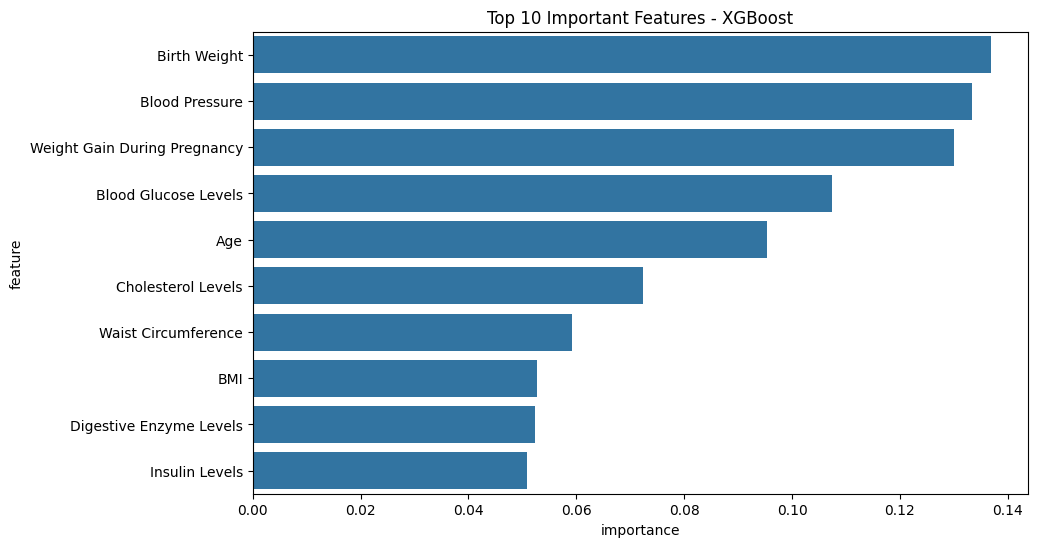

In [51]:
# Feature Importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_xgb.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Top 10 Important Features - XGBoost')
plt.show()